# Problem Sheet 1

In [1]:
# Load some packages (if you get an error, you need to install the package in the terminal)
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg as lg
import time
import seaborn as sns

## Wright-Fisher Model of population genetics

Fixed population of $L$ individuals.
Initially, $X_0(i) = i$ for $i \in [1,...,L]$

At each generation $t+1$, each individual $i$ picks uniformly a parent $j\sim U(\{1,...,L\})$ and adopts its type:

$X_{t+1}(i) = X_t(j)$

You can use `plt.pcolor(X)` or `sns.heatmap` to plot the dynamics in a simple heatmap

In [19]:
max_time = 200
L = 100

X = np.zeros(shape = (max_time, L)) #matrix, each row is new generation
X[0,:] = range(L) # initially individual i has type i (going from 0 - 99)

In [20]:
for t in range(1, max_time):
    old_states = X[t-1,:]
    new_states = [old_states[r] for r in np.random.randint(0,L, L)]
    X[t,:] = np.sort(new_states) #try it without np.sort
#    X[t,:] = new_states

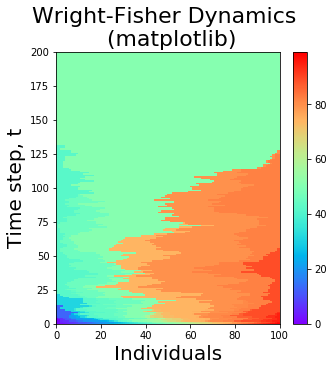

In [21]:
plt.figure(figsize = (5,5))
plt.ylabel('Time step, t', fontsize = 20)
plt.xlabel('Individuals', fontsize = 20)
plt.title('Wright-Fisher Dynamics \n (matplotlib)', fontsize = 22)
plt.pcolor(X,cmap="rainbow")
plt.colorbar()


Text(0.5, 1, 'Wright-Fisher Dynamics \n (seaborn)')

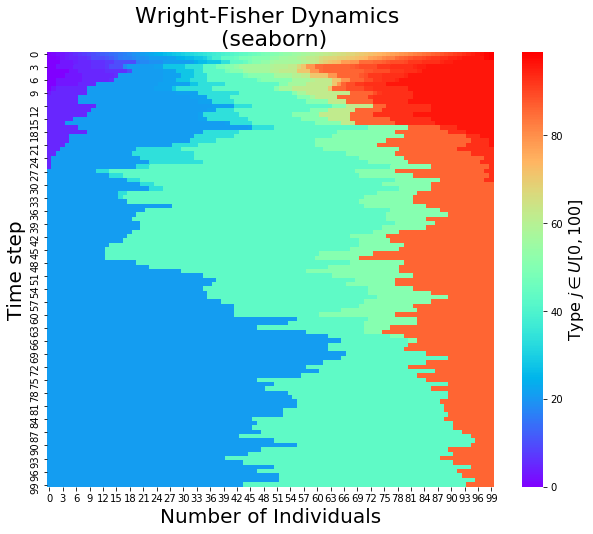

In [8]:
plt.figure(figsize = (10,8))
pcm = sns.heatmap(X,cbar_kws={'label': r'Type $j \in U[0,100]$'},cmap="rainbow")
pcm.figure.axes[-1].yaxis.label.set_size(16)
plt.ylabel('Time step', fontsize = 20)
plt.xlabel('Number of Individuals', fontsize = 20)
plt.title('Wright-Fisher Dynamics \n (seaborn)', fontsize = 22)


In [22]:
def am_done(v):
    '''Return true if all elements of v the same. Else false.'''
    u=np.unique(v) # unique  elements of v
    if u.shape[0]>1:
        return False
    else:
        return True

In [26]:
array_L = np.arange(1,L,5)
max_time = 500
repeat = 50
M = np.zeros((len(array_L), repeat))
for i in range(1, len(array_L)):
    for j in range(0, repeat):
        X=np.zeros((max_time+1,array_L[i])) #Initialize
        X[0,:]=np.arange(array_L[i]) # at t=0 individual i has type i

        for t in range(1,max_time+1): # Time steps. list of integers from 1 to T.

            old_states=X[t-1,:]
            new_states = [old_states[r] for r in np.random.randint(0,array_L[i], array_L[i])]


            new_states=np.sort(new_states)

            X[t,:]=new_states

            if am_done(new_states):
                M[i,j]=t
                break


In [27]:
average = np.mean(M, axis = 1)
deviation = np.std(M, axis = 1)

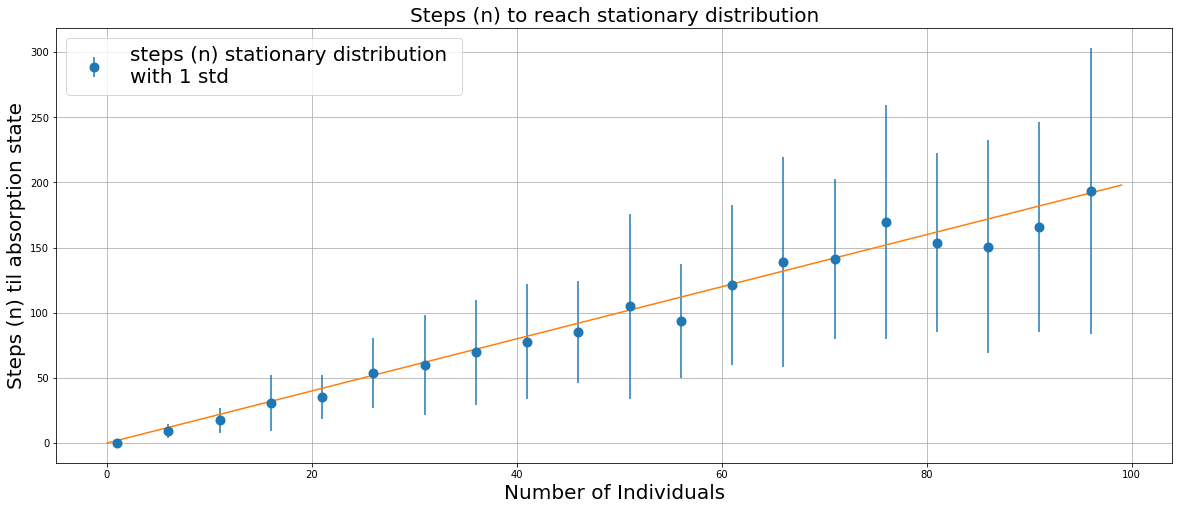

In [29]:
plt.figure(figsize = (20,8))
plt.ylabel(r'Steps (n) til absorption state', fontsize = 20)
plt.xlabel(r'Number of Individuals', fontsize = 20)
plt.title(r'Steps (n) to reach stationary distribution', fontsize = 20)

plt.errorbar(array_L, average, yerr = deviation, fmt = 'o', mew = 4, label = 'steps (n) stationary distribution \nwith 1 std')
plt.legend(loc='upper left', fontsize = 20)
plt.grid()

x = np.arange(0,100,1)
f = 2*x
plt.plot(x,f)

## Branching processes

A branching process $Z=(Z_n :n\in\mathbb{N} )$ on state space $S=\mathbb{N}$ models a growing population and is defined recursively by

$Z_0 =1\ ,\quad Z_{n+1} =X_{1,n} +\ldots +X_{Z_n ,n} \quad\mbox{ for all }n\geq 0\ .$

$X_{i,n} \in\mathbb{N}$ are iid RVs denoting the offspring of individuum $i$ in generation $n$, and $Z_n$ is the size of the population in generation $n$.

### Sample paths

In [30]:
### This may produce warning signs (comment out if needed)
font = {'family' : 'normal',
        'size'   : 22}
import matplotlib
matplotlib.rc('font', **font)

In [39]:
mu=1.
#p=0.25
time=10
samples=10
Z = np.ones((samples,time),dtype='int')   #initialize trajectories in matrix samples x time
for i in range(0,samples):
    Z[i][0]=1
    ## update for Poisson or geometric, need -Z for geometric since values are 1,2,...
    for t in range(1,time): Z[i][t]=sum(np.random.poisson(mu,Z[i][t-1]))
#    for t in range(1,time): Z[i][t]=(sum(np.random.geometric(p,Z[i][t-1]))-Z[i][t-1])

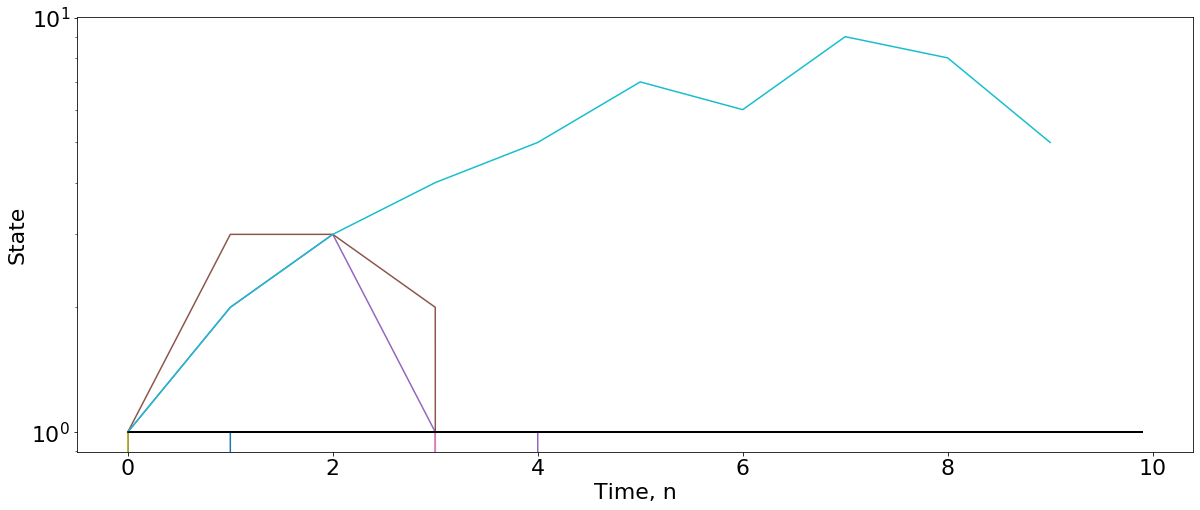

In [40]:
plt.figure(figsize = (20,8))
for k in range(0, samples):
    plt.plot(range(time), Z[k,:])

    x = np.arange(0,time,0.1)
#    mu=(1-p)/p
    f = pow(mu,x)
    plt.plot(x,f,color='black')
    plt.xlabel('Time, n')
    plt.ylabel('State')
    plt.yscale('log')

### Distribution at time n

We also define the empirical CDF and the empirical tail $(=1-\mathrm{CDF})$ to plot the distribution at fixed times.

In [41]:
def ecdf(data):
    """ Compute ECDF """
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)
def etail(data):
    """ Compute ECDF """
    x = np.sort(data)
    n = x.size
    y = 1-(np.arange(0, n) / n)
    return(x,y)

In [46]:
mu=2.
p=0.25
time=10
samples=50
zsample = np.ones(samples)
for i in range(0,samples-1):
    Z=1
    for t in range(1,time): Z=sum(np.random.poisson(mu,Z))
#    for t in range(1,time): Z=(sum(np.random.geometric(p,Z))-Z)  #range is k=1,2 so need -Z!
    zsample[i]=Z

Text(0, 0.5, '$\\mathbb{P}[Z_n >x]$')

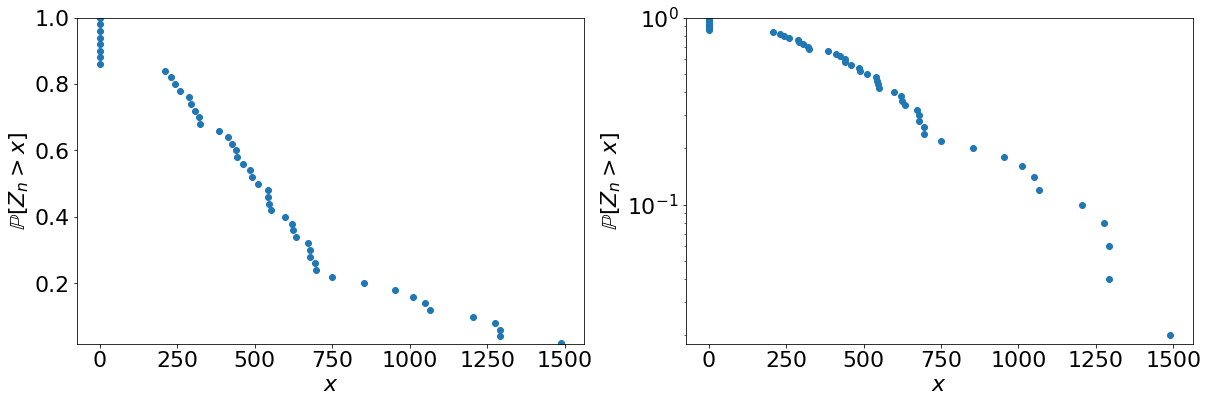

In [47]:
x,y=etail(zsample)

plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
plt.scatter(x=x,y=y)
plt.ylim(0.9/samples,1)
plt.xlabel(r'$x$')
plt.ylabel(r'$\mathbb{P}[Z_n >x]$')

plt.subplot(1,2,2)
plt.scatter(x=x,y=y)
plt.yscale('log')
plt.ylim(0.9/samples,1)
plt.xlabel(r'$x$')
plt.ylabel(r'$\mathbb{P}[Z_n >x]$')

### Probability generating function (PGF)

In [48]:
#Geometric PGF
def G1(s,p):
    return p/(1-(1-p)*s)

In [49]:
#Poisson PGF
def G2(s,mu):
    return np.exp(mu*(s-1))

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


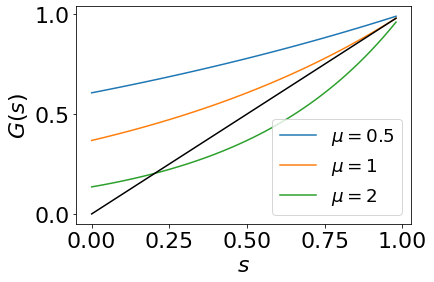

In [56]:
srange=np.arange(0,1,0.02)
#plt.plot(srange,G1(srange,0.5))
#plt.plot(srange,G1(srange,0.25))
#plt.plot(srange,G1(srange,0.75))
plt.plot(srange,G2(srange,0.5),label="$\mu =0.5$")
plt.plot(srange,G2(srange,1),label="$\mu =1$")
plt.plot(srange,G2(srange,2),label="$\mu =2$")
plt.plot(srange,srange,color='black')

plt.xlabel(r'$s$')
plt.ylabel(r'$G(s)$')
plt.legend(loc = 'best',fontsize='small')

### Time to extinction

In [90]:
mu=0.99
nmax=200
dist=np.zeros(nmax)
dist[0]=G2(0,mu)
for n in range(1,nmax): dist[n]=G2(dist[n-1],mu)

Text(0, 0.5, '$\\mathbb{P}[T >n]$')

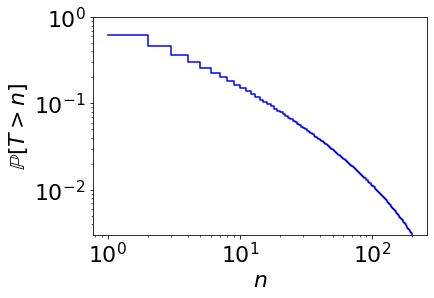

In [91]:
trange=np.arange(1,nmax+1)
plt.step(trange, 1-dist, 'b',where='post')
#plt.plot(trange, 1-dist, 'C0o', alpha=0.5)

plt.xscale('log')
plt.yscale('log')
plt.ylim(min(1-dist),1)

plt.xlabel(r'$n$')
plt.ylabel(r'$\mathbb{P}[T >n]$')

In [92]:
mu=0.99
#p=0.75
samples=50
tsample = np.ones(samples)
for i in range(0,samples-1):
    Z=1
    t=0
    while Z>0:
        Z=sum(np.random.poisson(mu,Z))
#        Z=(sum(np.random.geometric(p,Z))-Z)
        t+=1
    tsample[i]=t

Text(0, 0.5, '$\\mathbb{P}[Z_n >x]$')

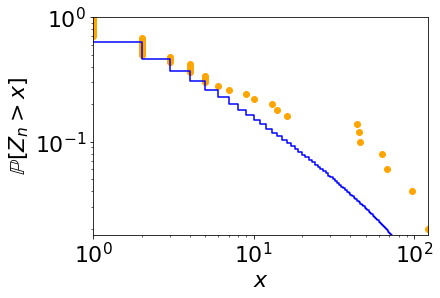

In [93]:
x,y=etail(tsample)

#plt.scatter(x=trange,y=1-dist)
plt.step(trange, 1-dist, 'b',where='post')
plt.scatter(x=x,y=y,color="orange")

plt.xscale('log')
plt.yscale('log')
plt.xlim(1,max(tsample))
plt.ylim(0.9/samples,1)
plt.xlabel(r'$x$')
plt.ylabel(r'$\mathbb{P}[Z_n >x]$')